In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("summer.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


# Summer Olympics Data Analysis Assignment

### 1. In how many cities Summer Olympics is held so far?

In [6]:
a=len(df['Country'].unique())
print("there are ",a, "countries in which games are held so far") #uniue countries all over the world
print("there are ",len(df['City'].unique()), "citis in which games are held so far") #uniue cities all over the world

there are  148 countries in which games are held so far
there are  22 citis in which games are held so far


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [7]:
x=df.groupby('Sport')[['Medal']]                   

Most no of gold medals are won  in 
             Sport
Aquatics     1421
Athletics    1215
Rowing        890
Gymnastics    820
Fencing       552


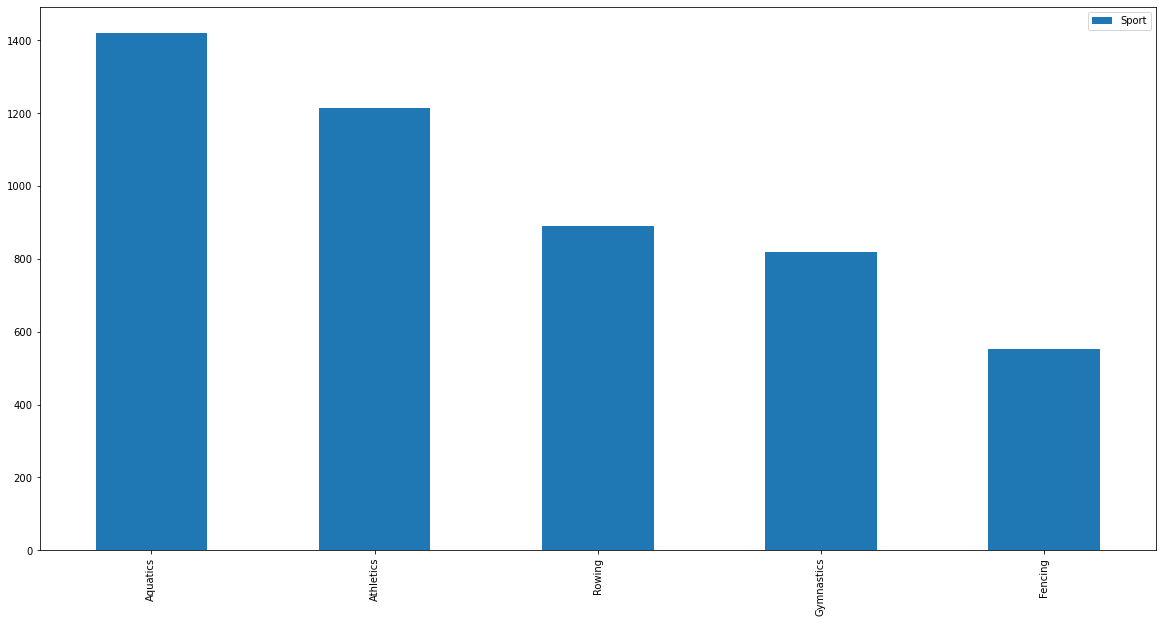

In [8]:
y=df['Medal'] == 'Gold' #taking the all gold creating an dataframe
z=df.loc[y]

z.Sport.value_counts().head().to_frame().plot.bar(figsize=(20, 10)) #counting all the unique values in sport 

print('Most no of gold medals are won  in \n',z.Sport.value_counts().head().to_frame())

### 3. Which sport is having most number of medals so far? (Top 5)

top sports those who have most number of medals -->>
 Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Football      1497
Hockey        1422
Wrestling     1212
Shooting      1150
Sailing       1109
Name: Sport, dtype: int64


<AxesSubplot:>

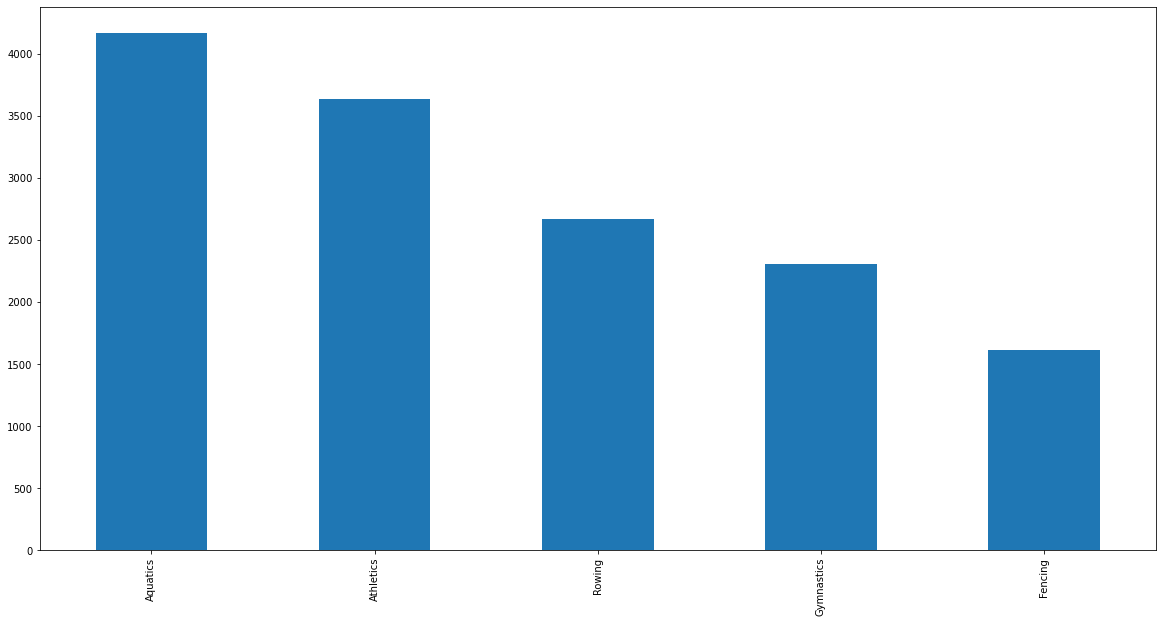

In [9]:
a=df['Sport']
print("top sports those who have most number of medals -->>\n",a.value_counts().head(10)) 
#since there are no null values in medals that means all unique sport appearing in dataset should have atleast one medal
a.value_counts().head(5).plot.bar(figsize=(20, 10))

### 4. Which player has won most number of medals? (Top 5)

top 5 players are-->>
 PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Athlete, dtype: int64


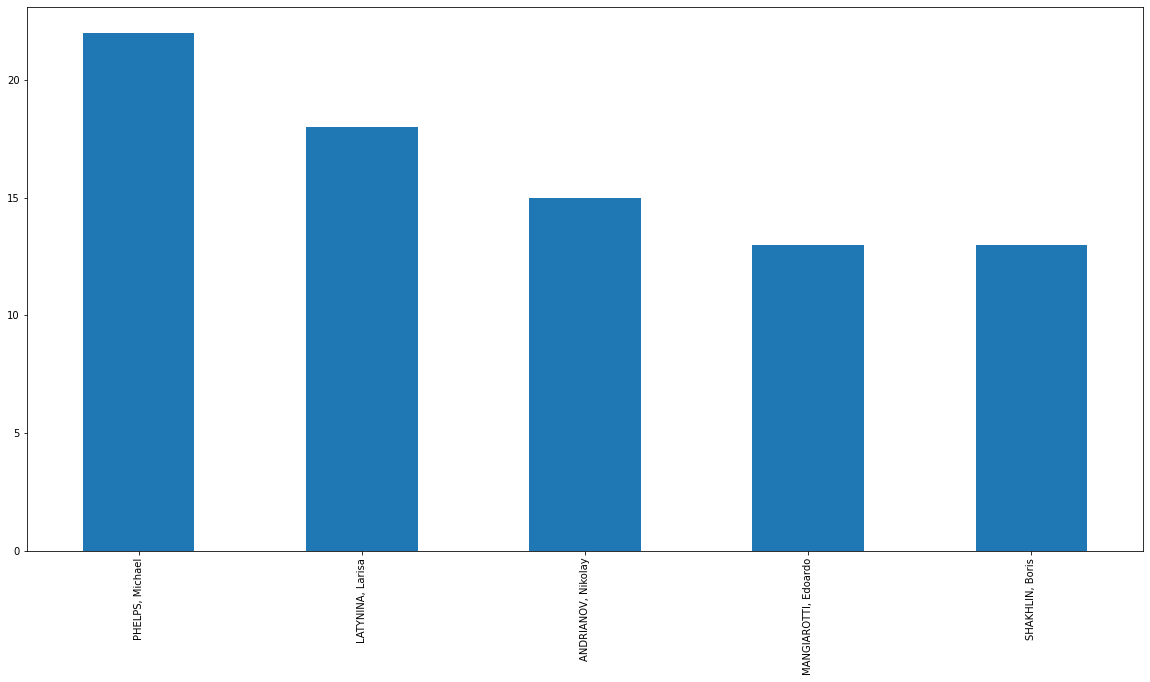

In [10]:
df.Athlete.value_counts().head().plot.bar(figsize=(20,10))
#since there are no null values in medals that means all unique players appearing in dataset should have medal
print("top 5 players are-->>\n",df.Athlete.value_counts().head())

### 5. Which player has won most number Gold Medals of medals? (Top 5)

                   0
Athlete             
PHELPS, Michael   18
NURMI, Paavo       9
SPITZ, Mark        9
LEWIS, Carl        9
LATYNINA, Larisa   9


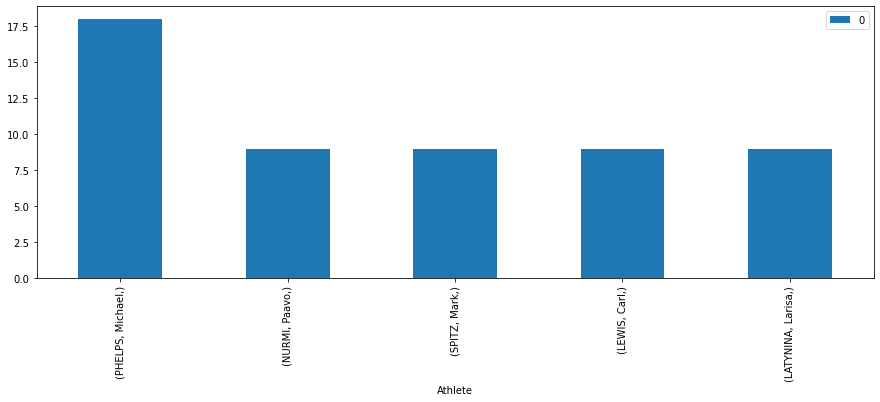

In [11]:
c=df.Medal == 'Gold'
b=df.loc[c] #creating df of gold medals

p=b.Athlete.to_frame() #convrting series into data frame
op=p.value_counts()
tt=op.to_frame().head()
print(tt)
tt.plot.bar(figsize=(15,5));

### 6. In which year India won first Gold Medal in Summer Olympics?

In [12]:
vv=df.Country=='IND'
i=df.loc[vv]
m=i.Medal=='Gold'  #df of india 

io=i.loc[m]  #df  of india with gold 
io['Year'].min() #extracting min of year
print('INDIA GOT THEIR FIRST GOLD MEDAL IN YEAR---->>>>',io['Year'].min())

INDIA GOT THEIR FIRST GOLD MEDAL IN YEAR---->>>> 1928


### 7. Which event is most popular in terms on number of players? (Top 5)

Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64


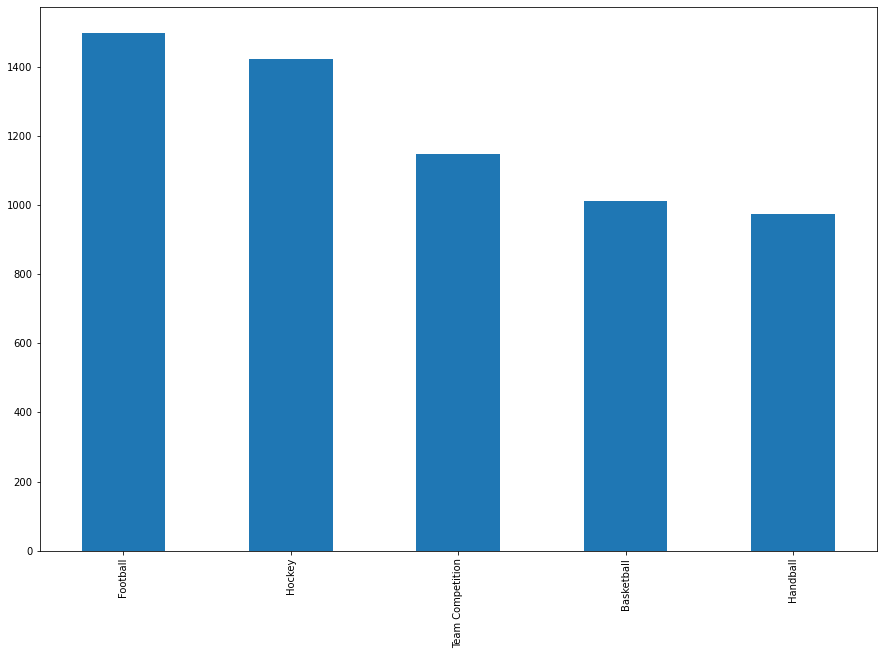

In [14]:
t=df[['Event','Athlete']]
t
#since that every column is having unique sport, so the no of sport occuring
#most, will have most no. of players 
t.Event.value_counts().head().plot.bar(figsize=(15,10));
print(t.Event.value_counts().head())

### 8. Which sport is having most female Gold Medalists? (Top 5)

THE MOST NO OF GOLD MEDALS BT WOMEN ARE IN THESE SPORTS-->>>
 Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Sport, dtype: int64


<AxesSubplot:>

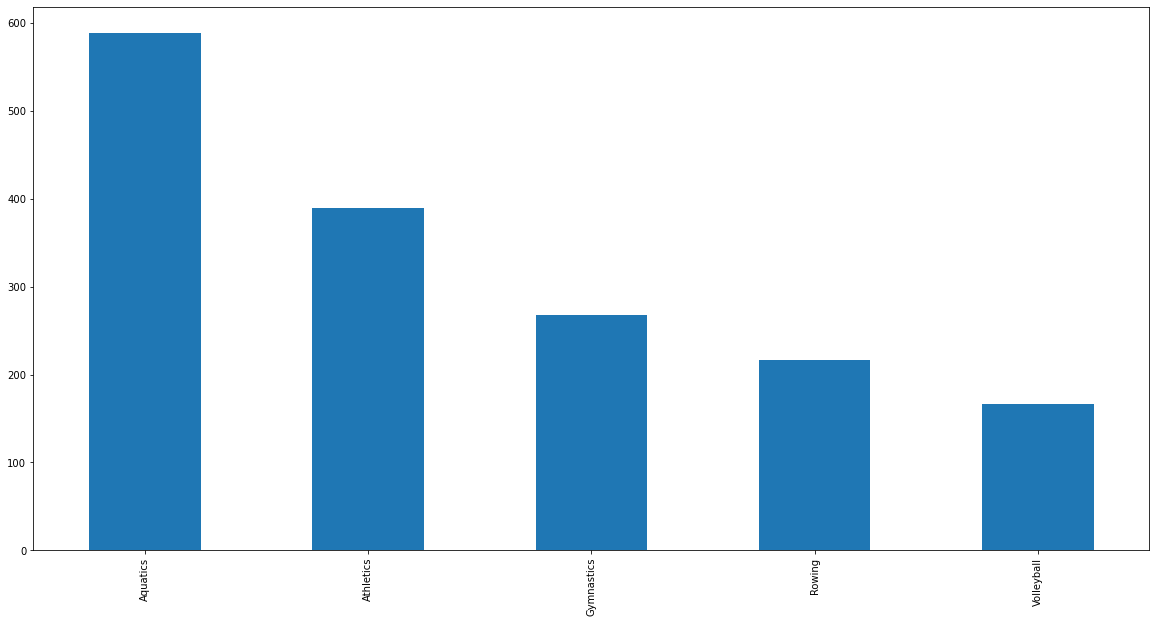

In [15]:
c=df[['Sport','Gender','Medal']] #selecting women gender and medal
w=c[c.Gender=="Women"] #taking all the women gender
gg=w[w.Medal=="Gold"] #taking all the gold in women
yy=gg.Sport.value_counts().head() #taking the sports those have female as welll as gold columns
print("THE MOST NO OF GOLD MEDALS BT WOMEN ARE IN THESE SPORTS-->>>\n",yy)
yy.plot.bar(figsize=(20,10))